0.6594973842353997


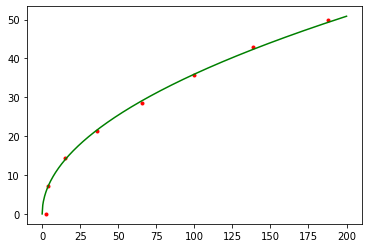

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
d = [2.51899828, 3.9144519, 15.2433935, 36.1663751, 65.57895301, 99.98960403, 138.58476921, 187.97869634]
vi = [ 0., 7.14285714,14.28571429,21.42857143, 28.57142857, 35.71428571, 42.85714286, 50. ]

def initialV(Δx,acc):
    return np.sqrt(2*acc*Δx)
data = curve_fit(initialV,d,vi)
plt.plot(d,vi,'r.')

x = np.linspace(0,200,500)
intV = initialV(x,data[0])
plt.plot(x,intV,'g')

g = 9.8
μ = data[0][0]/g
print(μ)

25.975757597064742 25.975757592064074 25.975757609067312


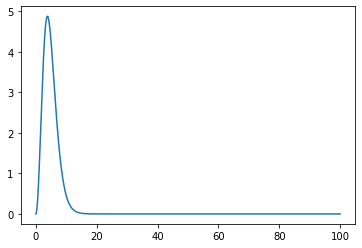

In [4]:
import numpy as np
x,dx = np.linspace(0.001,100,10000,retstep=True)
y = x**4 * np.exp(x)/(np.exp(x)-1)**2
rec = dx*np.sum(y)
trap = dx/2 * (y[0]+y[-1]+2*sum(y[1:-1]))
print(rec,trap,4/15 * np.pi**4)
plt.plot(x,y)

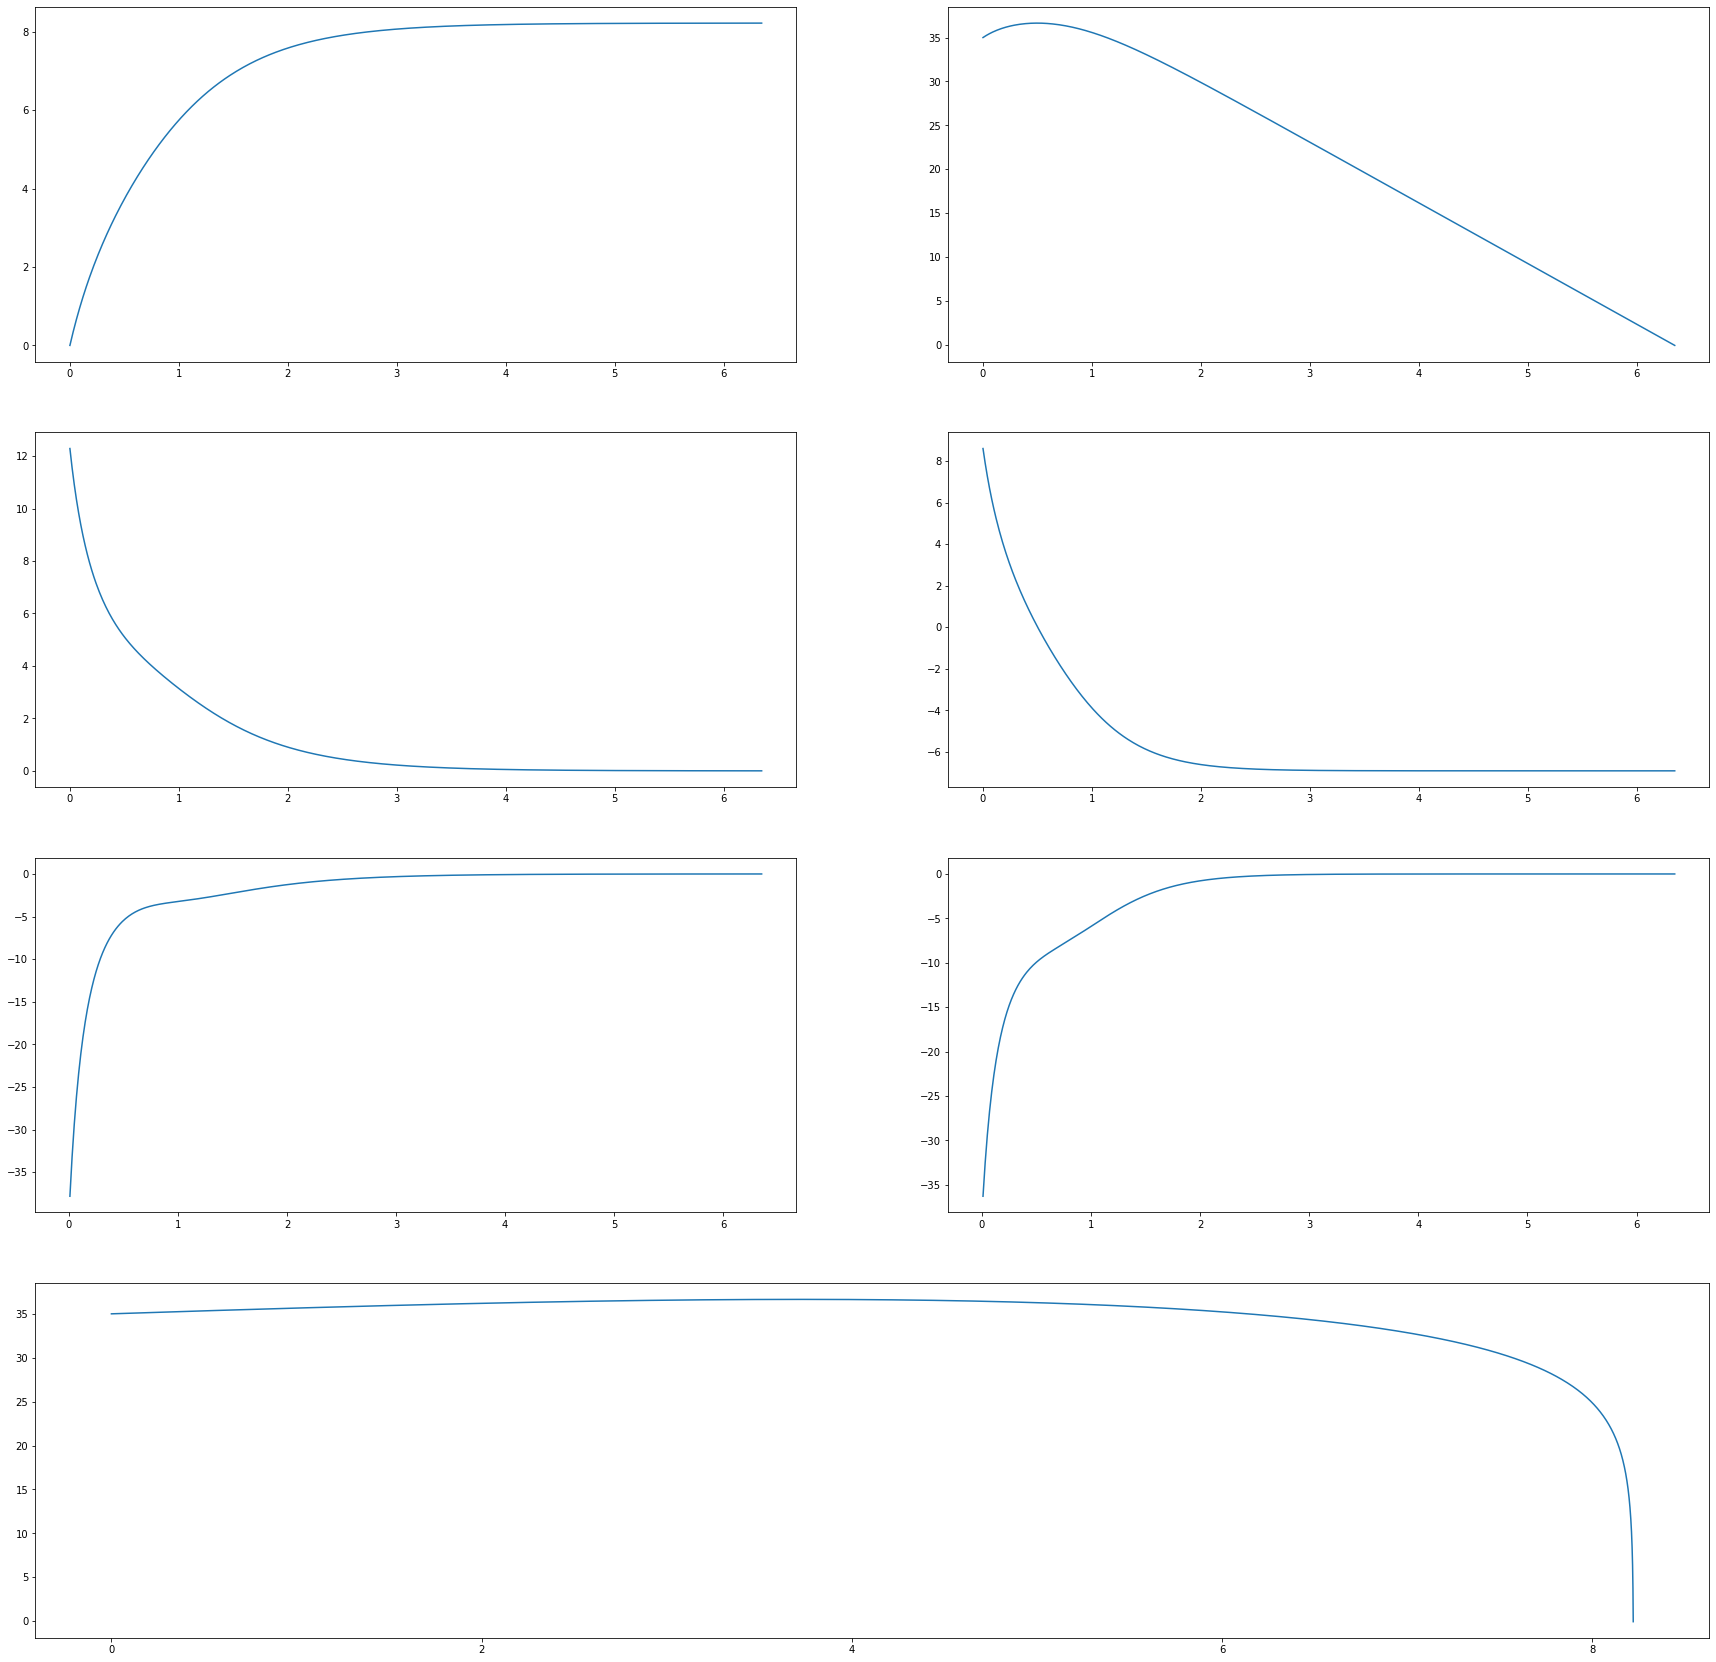

In [5]:
#Constants
dt = 0.01
g = 9.8
C = 0.45
ρ = 1.29
r = 0.15
m = 0.1
A = np.pi*r**2

#Initial
v = 15
θ = 35
vx = [v*np.cos(θ*np.pi/180)]
vy = [v*np.sin(θ*np.pi/180)]
y = [35]
x = [0]
t = [0]
ax = []
ay = []

while y[-1] >0:
    Fdx = 1/2 * ρ*A*C*vx[-1]*np.sqrt(vx[-1]**2+vy[-1]**2)
    Fdy = 1/2 * ρ*A*C*vy[-1]*np.sqrt(vx[-1]**2+vy[-1]**2)
    ax.append(-Fdx/m)
    ay.append(-Fdy/m-g)
    vx.append(vx[-1]+ax[-1]*dt)
    vy.append(vy[-1]+ay[-1]*dt)
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    t.append(t[-1]+dt)
    if t[-1]>1000:
        print('oops')
        break
        
fig = plt.figure(figsize=(30,30))
xt = fig.add_subplot(4,2,1)
yt = fig.add_subplot(4,2,2)
vxt = fig.add_subplot(4,2,3)
vyt = fig.add_subplot(4,2,4)
axt = fig.add_subplot(4,2,5)
ayt = fig.add_subplot(4,2,6)
xy = fig.add_subplot(4,1,4)
xt.plot(t,x)
#xt.title('x v t')
yt.plot(t,y)
#yt.title('y v t')
vxt.plot(t,vx)
vyt.plot(t,vy)
axt.plot(t[1:],ax)
ayt.plot(t[1:],ay)
xy.plot(x,y)

# Euler's Method

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/eulers.ipynb)


In PH121 you will learn(or have already learned) how the position, velocity, and acceleration of an object are related to one another.  One of the more challenging cases occurs when the acceleration of the object is not constant.  The acceleration could vary with position, velocity, or time.  In these cases, you may not be able to use calculus to find the position and/or velocity of an object. Instead, you'll have to repeatedly use these equations 
$$
v_{i+1} = v_i  + a_i \Delta t
$$
$$
x_{i+1} = x_i + v_i \Delta t
$$

with a very small $\Delta t$. If $\Delta t$ is sufficiently small, assuming that the acceleration is constant is a reasonable approximation. Below we will explain the physics of a few important situations where Euler's method is a good choice to solve the problem.

## Air Drag - One dimensional

The drag force (due to air resistance) is given by:

$$
F_\text{drag} = {1\over 2} C \cdot \rho_\mathrm{air} \cdot A \cdot v^2
$$

where $C$ is the drag coefficient, $\rho_\mathrm{air}$ is the density of air, and $A$ is the cross-sectional area of the projectile.  For an object that is dropped (or thrown) vertically, the acceleration is given by the following

$$
\begin{align*}
-m g - {1\over 2} \rho A C v^2 &= m a\\
-g - {1\over 2 m} \rho A C v^2 &= a\\
\end{align*}
$$

and we can use the standard kinematic equations with a very small $\Delta t$ to determine the position and velocity at future times.
$$
y_\mathrm{n+1} = y_n + v_n  \Delta t
$$
$$
 v_{n+1} = v_n - a \Delta t
$$


In the code cell below you will find an example of Euler's method for a small styrofoam ball that is dropped from the top of a $100$-m-tall building. The styrofoam ball has a mass $m = 100$ g, drag constant $C = 0.02$, radius $r = 0.25$ m and the density of air is $1.29$ kg/m$^3$.

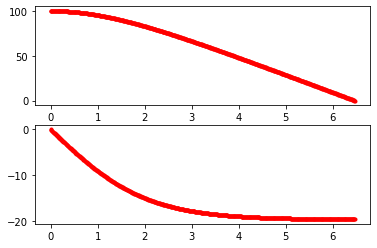

In [6]:
from matplotlib import pyplot as plt
from numpy import pi

dt = 0.01
v = [0]
y =[100]
t = [0]
g = 9.8
C = 0.02
rho = 1.29
r = .25
A = pi * r**2
m = .1

while y[-1] > 0:
    a = 1/2/m * rho * A * C * v[-1]**2 - g
    v.append(v[-1]+ a * dt)
    y.append(y[-1] + v[-1] * dt)
    t.append(t[-1] + dt)
    
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(t,y,'r.')
ax2.plot(t,v,'r.')
plt.show()

## Air Drag (two dimensional)

For two dimensional motion, we need to decompose the drag force into x and y components.

$$
\begin{align*}
F_x &= F_D \cos(\theta)\\
&= F_D {v_x\over v}\\
&= -{1\over 2} \rho A C v^2 {v_x\over v}\\
&= -{1\over 2} \rho A C v v_x\\
\end{align*}
$$

A similar expression for the y component of the drag force is 
$$
F_y = -{1\over 2} \rho A C v v_y\\
$$

## Rocket Propulsion

The liftoff of a rocket provides some interesting physics to consider.  The mass of the rocket + fuel is decreasing as the fuel burns off.  Hence, the acceleration of the rocket is very much not a constant.  However, in your code you don't want to decrease the mass of the rocket-fuel system forever or the mass will become lower than the mass of the rocket alone, and eventually will go negative (yikes!). Watch out for that.


The force of the thrust on the rocket is given by:
$$ F = v_e {dM\over dt}$$
where ${dM\over dt}$ is the rate of mass loss due to the fuel burning and $v_e$ is the speed with which the exhaust exits the rocket.  Can you do a unit analysis on this function and convince yourself that it has the right units?

The force of air drag on the rocket is quadratic. In other words, it is given by:
$$F_\text{drag} = {1\over 2} \rho A C v^2$$
where $\rho$ is the density of air, $A$ is the cross-sectional area of the rocket, and $C$ is the drag coefficient. Also notice that the direction of the drag force changes at the peak of the trajectory.  For the upward journey, the drag force points downward, and for the downward part of the journey, the drag force points upward.  To handle this efficiently when writing your code, I recommend calculating this force like this:
$$ F_D = {1\over 2} \rho A C v |v|$$
so that the sign of this calculation changes naturally at the peak of the trajectory.
 
 Since the rocket may travel a considerable distance into the atmosphere, we must take into account that the density of the atmosphere varies with altitude according to:
$$\rho(h) = (1.09 - {0.0065 h\over 300})^{2.5}$$



## Exercises

1. In 2012, Felix Baumgartner successfully jumped from a height of $39.0$ km above the surface of the Earth. Consider the complexities that this real-world examples provides:
   1. For this problem, we must include the force of air drag to get the calculation right.  The force of air drag is given by: $F_d = {1\over 2} \rho A C v^2$, with $C = 0.58$, $A = 1.04$ m$^2$
   2. Because Felix jumped from such a high altitude, the density of the atmosphere changed as he fell. The density of the atmosphere changes with altitude according to the following equation: $\rho = 1.2 \text{ (kg/m}^3\text{)} e^{-h\over 1 \times 10^4}$
   3. The acceleration due to gravity, g, is not constant over the flight, but changes with altitude according to the following equation: $g = {9.8 \text{ m/s}^2 \over (1 + {h\over R_E})^2}$, where $R_E = 6.37 \times 10^6$ m
   4. Assume that Felix's mass is $m = 73$ kg and that he starts from rest.  

   Use Euler's method to answer the following questions:
   1. How long does it take Felix to reach Earth's surface.  Give your answer to the nearest second. (Note: We are not considering a parachute in this case.. ouch.)  Answer: You should find that his flight took $\approx 400$ s.
   2. Compare the real fall time you just calculated to the dragless, constant-g ($9.8$m/s$^2$) fall time.  Answer: You should find that the fall time is $\approx 90$ s.  (big difference eh.)



Felix will make it to the ground in 394.830 seconds.


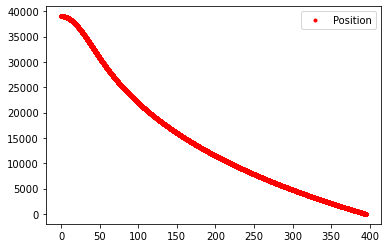

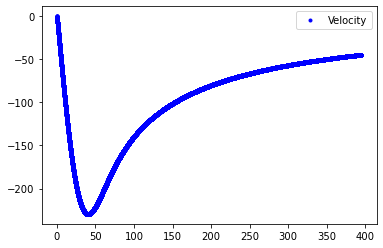

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#Constants
C = 0.58
A = 1.04
Re = 6.37e6
m = 73
dt = 0.01

#Initial Conditions
t = [0]
h = [39e3]
v = [0]


#Euler
while h[-1]>0:
    g = 9.8/(1+h[-1]/Re)**2
    ρ = 1.2*np.exp(-h[-1]/1e4)
    a = 1/2*ρ*A*C*v[-1]**2/m-g
    v.append(v[-1]+a*dt)
    h.append(h[-1]+v[-1]*dt)
    t.append(t[-1]+dt)
    if t[-1]>500:
        print('oops')
        break
print(f'Felix will make it to the ground in {t[-1]:.3f} seconds.')
xi = 39e3
grav = 9.8
time = np.sqrt(xi/grav)
plt.plot(t,h,'r.',label = 'Position')
plt.legend()
plt.show()
plt.plot(t,v,'b.',label='Velocity')
#plt.plot(t,a,'g.',label='Acceleration')
plt.legend()
plt.show()

2. A rocket has a total mass $M_i = 180$ kg, including $130$ kg of fuel and oxidizer. The rocket is launched from the ground, starting from rest at time $t = 0$ s, and puts out exhaust with a relative speed of $v_e = 1500$ m/s at a constant burn rate of ${dM \over dt} = 2.50$ kg/s. The burn lasts until the fuel runs out. 
Assume a cylindrical rocket with a fuselage radius $r = 20$ cm, and a drag coefficient of $C = 0.5$.  
   1. Using Euler's method, plot the position vs. time and velocity vs. time graphs for the rocket from the moment it lifts off until it hits the ground again.  Note: We're not modeling a parachute here. 
   2. Make sure your code is well commented.
   3. How long was the flight?
   4. What is the rocket's impact speed with the ground?
   5. Once you think your simulation is correct, play with some of the key parameters to ensure that the results of your simulation agree with your own intuition.  Here are some things you could try:
       1. Change the mass of the rocket.
       2. Change the mass of the fuel.
       3. Change the exhaust speed of the fuel.
       4. Change the drag coefficient.
       5. Change the size of the rocket (cross-sectional area).
              


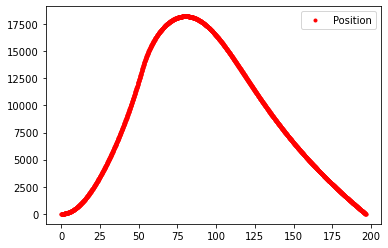

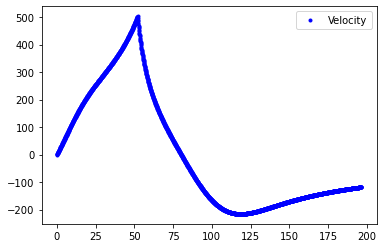

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Contstants
C = 0.5
r = 20e-2 #m
A = np.pi*r**2  #m^2
burn_rate = 2.5 #kg/s
Ms = 50 #kg
ve = 1500
Fthrust = ve*burn_rate
dt = 0.1

#initial
Mf = 130
Mtotal = Mf+Ms
v = [0]
y = [0]
t = [0]

while y[-1]>=0:
    g = 9.8
    ρ = 1.2*np.exp(-y[-1]/1e4)
    Fd = 1/2*ρ*A*C*v[-1]*abs(v[-1])
    a= -g+Fthrust/Mtotal - Fd/Mtotal
    Mf -= burn_rate*dt
    if Mf < 0:
        Mf = 0
        Fthrust = 0
    Mtotal = Ms+ Mf
    v.append(v[-1]+a*dt)
    y.append(y[-1]+v[-1]*dt)
    t.append(t[-1]+dt)
    if t[-1]>10000:
        print('oops')
        break
plt.plot(t,y,'r.',label='Position')
plt.legend()
plt.show()
plt.plot(t,v,'b.',label='Velocity')
plt.legend()
plt.show()

3. The distance from home plate to the home run fence is $550$ feet. It is well known that it is easier to hit home run in Denver (where the altitude is higher and the air density is lower) than it is in a ballpark that is closer to sea level. Use Euler's method to determine the initial speed needed to hit a home run at sea level where the air density is $\rho = 1.225$ kg/m$^3$.  Then repeat the calculation for a ballpark in Denver where the air density is $82\%$ of the sea level value.  If you were a pitcher, would you feel inclined to pitch in Denver?  The drag constant for a baseball is not constant with its speed.  Experimental work has revealed the following expression for the group of variables that multiplies velocity in the drag equation (at sea level)

$$
{1\over 2 m} \rho A C  = {B \over m} = .0039 + {.0058\over 1 + e^{v - 35\over 5}}
$$


Home run! The ball went 671.014 feet with an initial speed of 14.326 ft/s and an angle of 35 degrees


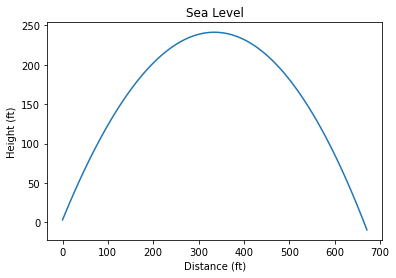

Home run! The ball went 674.043 feet with an initial speed of 14.326 ft/s and an angle of 35 degrees


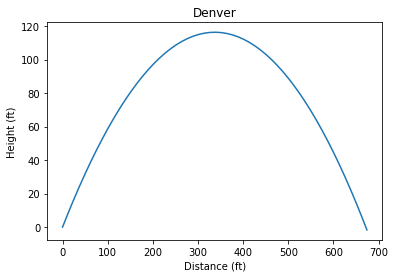

In [2]:
import numpy as np
import matplotlib.pyplot as plt
drag = lambda v: 0.0039+.0058/(1+np.exp((v-35)/5))
# Sea Level
#Constants
g = 9.8
dt = 0.1

#Initial
v = 47
θ = 35
vx = [v*np.sin(θ*np.pi/180)]
vy = [v*np.cos(θ*np.pi/180)]
x = [0]
y = [1]
t = [0]

while y[-1] >= 0:
    ax = -drag(np.sqrt(vx[-1]**2+ vy[-1]**2)) * vx[-1]
    ay = -drag(np.sqrt(vy[-1]**2 +vx[-1]**2)) * vy[-1]-g
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    t.append(t[-1]+dt)
    if t[-1]>1000:
        print('oops')
        break
if x[-1]>=550*.3048:
    print(f'Home run! The ball went {x[-1]*3.28084 :.3f} feet with an initial speed of {v*.3048:.3f} ft/s and an angle of {θ} degrees')
else:
    print(f'Not a home run. It went {x[-1]*3.28084 :.3f} ft.')
plt.plot(np.array(x)*3.28084,np.array(y)*3.28084)
plt.title('Sea Level')
plt.xlabel('Distance (ft)')
plt.ylabel('Height (ft)')
plt.show()

#Denver
#Initial
#Reusing the v and θ from earlier
vx = [v*np.cos(θ*np.pi/180)]
vy = [v*np.sin(θ*np.pi/180)]
x = [0]
y = [0]
t = [0]

while y[-1] >= 0:
    ax = -drag(np.sqrt(vx[-1]**2+ vy[-1]**2))*.82 * vx[-1]
    ay = -drag(np.sqrt(vy[-1]**2 +vx[-1]**2))*.82 * vy[-1]-g
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    t.append(t[-1]+dt)
    if t[-1]>1000:
        print('oops')
        break
if x[-1]>=550*.3048:
    print(f'Home run! The ball went {x[-1]*3.28084 :.3f} feet with an initial speed of {v*.3048:.3f} ft/s and an angle of {θ} degrees')
else:
    print(f'Not a home run. It went {x[-1]*3.28084 :.3f} ft. ')
    
plt.plot(np.array(x)*3.28084,np.array(y)*3.28084)
plt.title('Denver')
plt.xlabel('Distance (ft)')
plt.ylabel('Height (ft)')
plt.show()

It goes farther in Denver than it does at sea level. I would prefer to pitch at sea level.